In [1]:
## Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

## Load data 
rootins_og = pd.read_csv("Root_Insurance_data.csv")
root_insurance = rootins_og.copy()
root_insurance.head()

## Change Column Names 
root_ins = root_insurance.rename({'Currently Insured':'Currently_Insured','Number of Vehicles':'NumVehicles',
                                  'Number of Drivers':'NumDrivers','Marital Status':'MaritalStat','rank':'Rank'},axis='columns')
root_ins.head()

,Currently_Insured,NumVehicles,NumDrivers,MaritalStat,bid,Rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0


        NumVehicles    NumDrivers      bid          Rank  policies_sold
count  10000.000000  10000.000000  10000.0  10000.000000   10000.000000
mean       1.965400      1.499900     10.0      3.184100       0.078300
std        0.807755      0.500025      0.0      1.377242       0.268657
min        1.000000      1.000000     10.0      1.000000       0.000000
25%        1.000000      1.000000     10.0      2.000000       0.000000
50%        2.000000      1.000000     10.0      3.000000       0.000000
75%        3.000000      2.000000     10.0      4.000000       0.000000
max        3.000000      2.000000     10.0      5.000000       1.000000

There are 10,000 samples
Of 10,000 samples,  1878  were clicked and  783  were sold.
[[ 725.  886.]
 [ 740.  868.]
 [1173. 1228.]
 [1090.  999.]
 [1273. 1018.]]
[725. 886.]
2


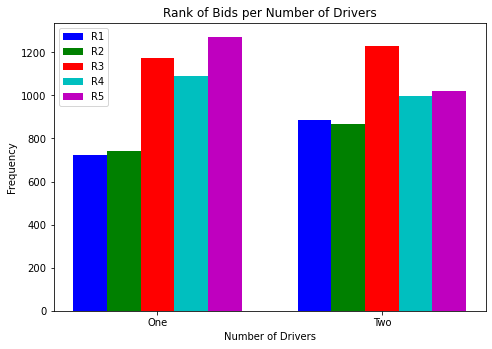

In [30]:
## Exploratory analysis
print(root_ins.describe())
print()
print("There are 10,000 samples")

## Clicks -> sold 
sold_policies = root_ins.loc[(root_ins.policies_sold == 1) & (root_ins.click == True)]
clicked = root_ins.loc[(root_ins.click == 1)]

print('Of 10,000 samples, ',clicked.shape[0],' were clicked and ',sold_policies.shape[0],' were sold.')

## Rank of Bids per Number of drivers 
max_driver = root_ins['NumDrivers'].max()
max_rank = root_ins['Rank'].max()

rank_by_driver = np.empty((max_rank,max_driver))

for j in range(1,max_driver+1):
    
    for i in range(1,max_rank+1):
        rank_by_driver[i-1,j-1] = root_ins.loc[(root_ins.NumDrivers == j) & (root_ins.Rank == i)].shape[0]
        
print(rank_by_driver)

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, rank_by_driver[0], color = 'b', width = 0.15)
ax.bar(X + 0.15, rank_by_driver[1], color = 'g', width = 0.15)
ax.bar(X + 0.3, rank_by_driver[2], color = 'r', width = 0.15)
ax.bar(X + 0.45, rank_by_driver[3], color = 'c', width = 0.15)
ax.bar(X + 0.6, rank_by_driver[4], color = 'm', width = 0.15)

ax.legend(labels=['R1', 'R2','R3','R4','R5'])

ind = np.arange(max_driver)
ax.set_xticks([.3,1.3])
ax.set_xticklabels(['One','Two'])
plt.xlabel('Number of Drivers')
plt.ylabel('Frequency')
plt.title('Rank of Bids per Number of Drivers')
## Customer info -> policies sold
print(rank_by_driver[0])


[[ 898.  561.  152.]
 [ 910.  463.  235.]
 [ 927.  744.  730.]
 [ 531.  695.  863.]
 [ 175. 1001. 1115.]]


Text(0.5, 1.0, 'Rank of Bids per Number of Vehicles')

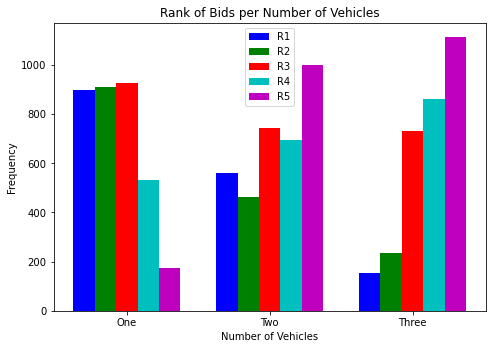

In [3]:
## Rank of Drivers per Number of Vehicle 

max_vehicle = root_ins['NumVehicles'].max()
max_rank = root_ins['Rank'].max()

rank_by_vehicle = np.empty((max_rank,max_vehicle))

for j in range(1,max_vehicle+1):
    
    for i in range(1,max_rank+1):
        rank_by_vehicle[i-1,j-1] = root_ins.loc[(root_ins.NumVehicles == j) & (root_ins.Rank == i)].shape[0]
        
print(rank_by_vehicle)

X = np.arange(max_vehicle)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, rank_by_vehicle[0], color = 'b', width = 0.15)
ax.bar(X + 0.15, rank_by_vehicle[1], color = 'g', width = 0.15)
ax.bar(X + 0.3, rank_by_vehicle[2], color = 'r', width = 0.15)
ax.bar(X + 0.45, rank_by_vehicle[3], color = 'c', width = 0.15)
ax.bar(X + 0.6, rank_by_vehicle[4], color = 'm', width = 0.15)

ax.legend(labels=['R1', 'R2','R3','R4','R5'])

ax.set_xticks([.3,1.3,2.3])
ax.set_xticklabels(['One','Two','Three'])
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.title('Rank of Bids per Number of Vehicles')
## Customer info -> policies sold

[[ 805.  806.]
 [ 827.  781.]
 [1269. 1132.]
 [1086. 1003.]
 [1204. 1087.]]
['M' 'S']


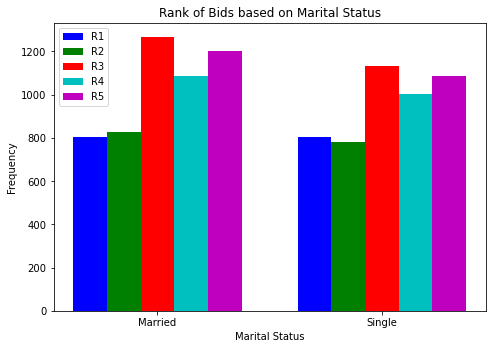

In [4]:
## Rank of customers per Marital Status 

MSvals = root_ins.MaritalStat.unique()
numMS = len(MSvals)

rank_by_ms = np.empty((max_rank,numMS))

for j in range(1,numMS+1):
    
    for i in range(1,max_rank+1):
        rank_by_ms[i-1,j-1] = root_ins.loc[(root_ins.MaritalStat == MSvals[j-1]) & (root_ins.Rank == i)].shape[0]

print(rank_by_ms)

X = np.arange(numMS)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, rank_by_ms[0], color = 'b', width = 0.15)
ax.bar(X + 0.15, rank_by_ms[1], color = 'g', width = 0.15)
ax.bar(X + 0.3, rank_by_ms[2], color = 'r', width = 0.15)
ax.bar(X + 0.45, rank_by_ms[3], color = 'c', width = 0.15)
ax.bar(X + 0.6, rank_by_ms[4], color = 'm', width = 0.15)

ax.legend(labels=['R1', 'R2','R3','R4','R5'])

ax.set_xticks([.3,1.3])
ax.set_xticklabels(['Married','Single'])
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Rank of Bids based on Marital Status')
print(MSvals)

[[ 763. 1146. 2050. 1921. 2242.]
 [ 848.  462.  351.  168.   49.]]


Text(0.5, 1.0, 'Click Status based on Rank')

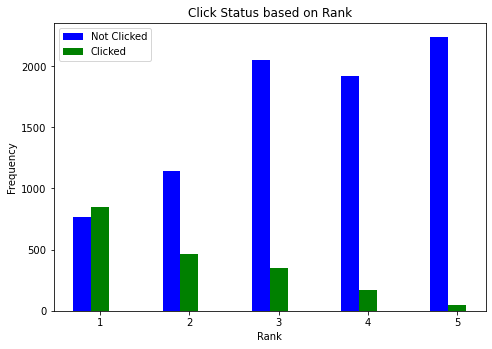

In [5]:
## Whether customers clicked, based on Rank 

click_stat = root_ins.click.unique()
numClick = len(click_stat)

click_by_rank = np.empty((numClick,max_rank))

for j in range(1,numClick+1):
    
    for i in range(1,max_rank+1):
        click_by_rank[j-1,i-1] = root_ins.loc[(root_ins.click == click_stat[j-1]) & (root_ins.Rank == i)].shape[0]

print(click_by_rank)

X = np.arange(max_rank)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_by_rank[0], color = 'b', width = 0.2)
ax.bar(X + 0.2, click_by_rank[1], color = 'g', width = 0.2)


ax.legend(labels=['Not Clicked','Clicked'])

ax.set_xticks([.2,1.2,2.2,3.2,4.2])
ax.set_xticklabels(['1','2','3','4','5'])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Click Status based on Rank')


[[4279. 3843.]
 [ 912.  966.]]


Text(0.5, 1.0, 'Click Status based on Marital Status')

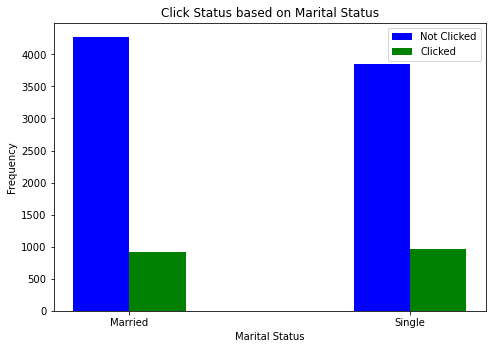

In [6]:
## Whether customers clicked, based on Marital Status 

click_by_MS = np.empty((numClick,numMS))

for j in range(0,numClick):
    
    for i in range(0,numMS):
        click_by_MS[j,i] = root_ins.loc[(root_ins.click == click_stat[j]) & (root_ins.MaritalStat == MSvals[i])].shape[0]

print(click_by_MS)

X = np.arange(numMS)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_by_MS[0], color = 'b', width = 0.2)
ax.bar(X + 0.2, click_by_MS[1], color = 'g', width = 0.2)


ax.legend(labels=['Not Clicked','Clicked'])

ax.set_xticks([.1,1.1])
ax.set_xticklabels(['Married','Single'])
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Click Status based on Marital Status')

[[4104. 4018.]
 [ 897.  981.]]
2


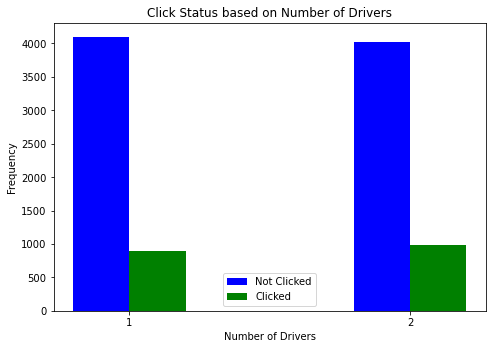

In [31]:
## Whether customers clicked, based on the number of Drivers 

click_by_driver = np.empty((numClick,max_driver))

for j in range(0,numClick):
    
    for i in range(1,max_driver+1):
        click_by_driver[j,i-1] = root_ins.loc[(root_ins.click == click_stat[j]) & (root_ins.NumDrivers == i)].shape[0]

print(click_by_driver)

X = np.arange(max_driver)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_by_driver[0], color = 'b', width = 0.2)
ax.bar(X + 0.2, click_by_driver[1], color = 'g', width = 0.2)


ax.legend(labels=['Not Clicked','Clicked'])

ax.set_xticks([.1,1.1])
ax.set_xticklabels(['1','2'])
plt.xlabel('Number of Drivers')
plt.ylabel('Frequency')
plt.title('Click Status based on Number of Drivers')


[[2480. 2901. 2741.]
 [ 961.  563.  354.]]


Text(0.5, 1.0, 'Click Status based on Number of Vehicles')

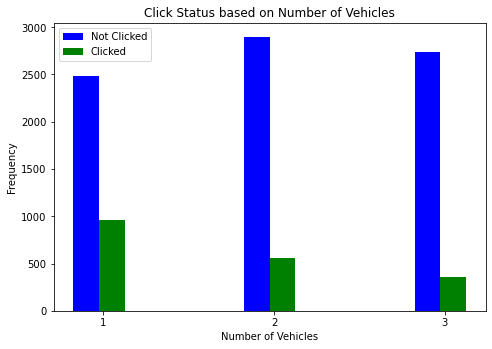

In [8]:
## Whether customers clicked, based on the number of vehicles 

click_by_vehicle = np.empty((numClick,max_vehicle))

for j in range(0,numClick):
    
    for i in range(1,max_vehicle+1):
        click_by_vehicle[j,i-1] = root_ins.loc[(root_ins.click == click_stat[j]) & (root_ins.NumVehicles == i)].shape[0]

print(click_by_vehicle)

X = np.arange(max_vehicle)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_by_vehicle[0], color = 'b', width = 0.15)
ax.bar(X + 0.15, click_by_vehicle[1], color = 'g', width = 0.15)

ax.legend(labels=['Not Clicked','Clicked'])

ax.set_xticks([.1,1.1,2.1])
ax.set_xticklabels(['1','2','3'])
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.title('Click Status based on Number of Vehicles')



[[1253. 1399. 2263. 2031. 2271.]
 [ 358.  209.  138.   58.   20.]]


Text(0.5, 1.0, 'Policies Sold based on Rank')

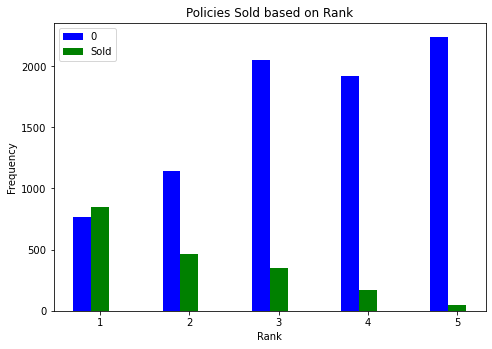

In [9]:
## How many policies were sold based on rank

sold_stat = root_ins.policies_sold.unique()
numPS = len(sold_stat)

sold_by_rank = np.empty((numPS,max_rank))

for j in range(0,numClick):
    
    for i in range(1,max_rank+1):
        sold_by_rank[j,i-1] = root_ins.loc[(root_ins.policies_sold == sold_stat[j]) & (root_ins.Rank == i)].shape[0]

print(sold_by_rank)

X = np.arange(max_rank)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_by_rank[0], color = 'b', width = 0.2)
ax.bar(X + 0.2, click_by_rank[1], color = 'g', width = 0.2)


ax.legend(labels=['0','Sold'])

ax.set_xticks([.2,1.2,2.2,3.2,4.2])
ax.set_xticklabels(['1','2','3','4','5'])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Policies Sold based on Rank')



[[4279. 3843.]
 [ 912.  966.]]


Text(0.5, 1.0, 'Policies Sold based on Marital Status')

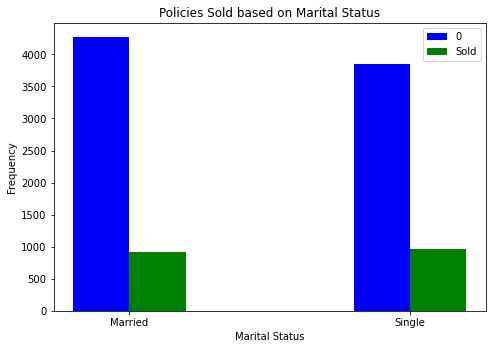

In [10]:
## Policies sold based on marital status 

sale_by_MS = np.empty((numPS,numMS))

for j in range(0,numPS):
    
    for i in range(0,numMS):
        sale_by_MS[j,i] = root_ins.loc[(root_ins.policies_sold == sold_stat[j]) & (root_ins.MaritalStat == MSvals[i])].shape[0]

print(click_by_MS)

X = np.arange(numMS)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_by_MS[0], color = 'b', width = 0.2)
ax.bar(X + 0.2, click_by_MS[1], color = 'g', width = 0.2)


ax.legend(labels=['0','Sold'])

ax.set_xticks([.1,1.1])
ax.set_xticklabels(['Married','Single'])
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Policies Sold based on Marital Status')

[[4104. 4018.]
 [ 897.  981.]]
2


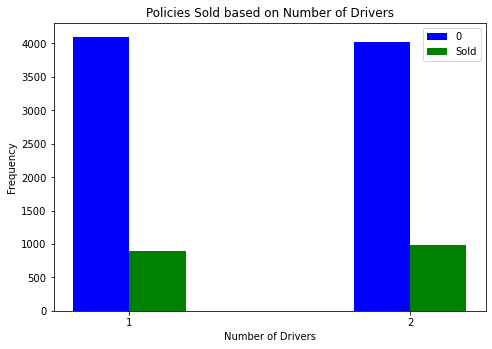

In [32]:
## policies sold based on number of drivers 

sale_by_driver = np.empty((numPS,max_driver))

for j in range(0,numPS):
    
    for i in range(1,max_driver+1):
        sale_by_driver[j,i-1] = root_ins.loc[(root_ins.policies_sold == click_stat[j]) & (root_ins.NumDrivers == i)].shape[0]

print(click_by_driver)

X = np.arange(max_driver)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_by_driver[0], color = 'b', width = 0.2)
ax.bar(X + 0.2, click_by_driver[1], color = 'g', width = 0.2)


ax.legend(labels=['0','Sold'])

ax.set_xticks([.1,1.1])
ax.set_xticklabels(['1','2'])
plt.xlabel('Number of Drivers')
plt.ylabel('Frequency')
plt.title('Policies Sold based on Number of Drivers')

[[3002. 3249. 2966.]
 [ 439.  215.  129.]]


Text(0.5, 1.0, 'Policies Sold based on Number of Vehicles')

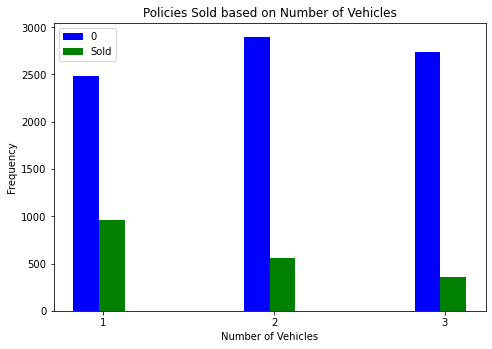

In [12]:
## policies sold based on the number of vehicles  

sale_by_vehicle = np.empty((numPS,max_vehicle))

for j in range(0,numPS):
    
    for i in range(1,max_vehicle+1):
        sale_by_vehicle[j,i-1] = root_ins.loc[(root_ins.policies_sold == click_stat[j]) & (root_ins.NumVehicles == i)].shape[0]

print(sale_by_vehicle)

X = np.arange(max_vehicle)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, click_by_vehicle[0], color = 'b', width = 0.15)
ax.bar(X + 0.15, click_by_vehicle[1], color = 'g', width = 0.15)

ax.legend(labels=['0','Sold'])

ax.set_xticks([.1,1.1,2.1])
ax.set_xticklabels(['1','2','3'])
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.title('Policies Sold based on Number of Vehicles')

  NumDrivers Frequency MS
0          1      2529  M
1          2      2662  M
2          1      2472  S
3          2      2337  S


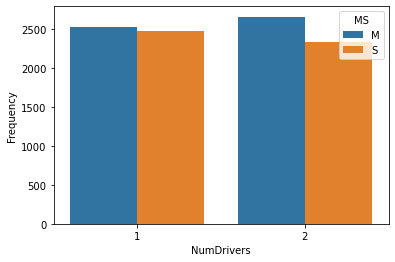

In [49]:
## Relationship between marital status, number of drivers, and number of vehicles 
import seaborn as sns 

## Marital Status and Number of Drivers 
MS_numDrivers = pd.DataFrame(columns = ['NumDrivers','Frequency','MS'])

for j in range(0,numMS):
     for i in range(1,max_driver+1):       
        freq = root_ins.loc[(root_ins.NumDrivers == i) & (root_ins.MaritalStat == MSvals[j])].shape[0]
        temp = pd.DataFrame([[i,freq,MSvals[j]],],columns = ['NumDrivers','Frequency','MS'])
        MS_numDrivers = MS_numDrivers.append(temp, ignore_index = True)

sns.barplot(x="NumDrivers", y="Frequency", hue="MS", data=MS_numDrivers)
print(MS_numDrivers)



1
2
3
1
2
3
  NumVehicle Frequency MS
0          1      1732  M
1          2      1734  M
2          3      1725  M
3          1      1709  S
4          2      1730  S
5          3      1370  S


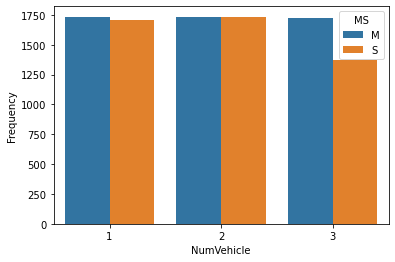

In [50]:
## Marital Status and Number of Vehicles
MS_numVehicle = pd.DataFrame(columns = ['NumVehicle','Frequency','MS'])

for j in range(0,numMS):
     for i in range(1,max_vehicle+1):       
        freq = root_ins.loc[(root_ins.NumVehicles == i) & (root_ins.MaritalStat == MSvals[j])].shape[0]
        temp = pd.DataFrame([[i,freq,MSvals[j]],],columns = ['NumVehicle','Frequency','MS'])
        MS_numVehicle = MS_numVehicle.append(temp, ignore_index = True)
        print(i)

sns.barplot(x="NumVehicle", y="Frequency", hue="MS", data=MS_numVehicle)
print(MS_numVehicle)

1
2
3
1
2
3
  NumVehicle Frequency Driver
0          1      1709      1
1          2      1637      1
2          3      1655      1
3          1      1732      2
4          2      1827      2
5          3      1440      2


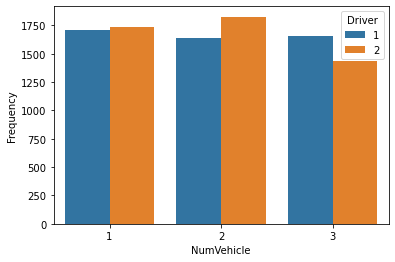

In [57]:
## Number of Drivers and Number of Vehicles 
numVehicle_driver = pd.DataFrame(columns = ['NumVehicle','Frequency','Driver'])

for j in range(1,max_driver+1):
     for i in range(1,max_vehicle+1):       
        freq = root_ins.loc[(root_ins.NumVehicles == i) & (root_ins.NumDrivers == j)].shape[0]
        temp = pd.DataFrame([[i,freq,j],],columns = ['NumVehicle','Frequency','Driver'])
        numVehicle_driver = numVehicle_driver.append(temp, ignore_index = True)
        print(i)

sns.barplot(x="NumVehicle", y="Frequency", hue="Driver", data=numVehicle_driver)
print(numVehicle_driver)